# Physics 344: Assignment 2
Answer the following questions in this notebook using Python code, together with appropriate discussions and calculations in Markdown cells.

**Student Name:** Ryan Shearer  

**Student Number:** 24695394

In [2]:
# https://numpy.org/doc/stable/reference/random/generator.html
# https://docs.scipy.org/doc/scipy/reference/integrate.html

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
rng=np.random.default_rng()

## Question 1

As a companion to $\pi$-darts, here is another entry for the exhibit of horribly inefficient ways of calculating mathematical constants:

*The average number of $U(0,1)$ random numbers you need to add to get a result larger than one is $e$.*

Estimate $e$ together with the RMS error by using this approach for a sample size of $n=500000$. What is the actual percentage error of your estimate? 

In [3]:
n=500000

uniform_samples = rng.uniform(0,1,n)
counts = []
for _ in range(n):
    total = 0
    count = 0
    while total <= 1:
        total += rng.uniform(0,1)
        count += 1
    counts.append(count)

Mn = np.mean(counts) 
print("estimated_e: ",Mn) 


sum2 =0

for i in counts:
    sum2 += (i - Mn)**2

Sn = np.sqrt((1/(n-1)) * sum2)

print("RMS =",Sn/np.sqrt(n)) 


print("Percentage Error: ",abs(Mn - np.e)/np.e)

estimated_e:  2.717188
RMS = 0.0012387501016403563
Percentage Error:  0.0004023970022508695


## Question 2

Here you will use Monte Carlo to estimate the average distance $D$ between points in the unit disk. You will need to use what you learned in Question 7 of Assignment 1. The exact answer is $D=128/(45\pi)$, which results from evaluating a four-dimensional integral.

1. Write a function that generates an estimate of $D$ based on a given sample size $n$. In the notation of the direct sampling recipe, your function should return $m_n$ (the estimate of $D$) as well as $s_n/\sqrt{n}$ (the estimate of the RMS error).
2. Generate an estimate for $D$ using a sample with $n=10000$, and report this together with the estimated $95.5\%$ confidence interval.
2. Next we want to test our understanding of confidence intervals. If we generate a large number of estimates of $D$ (each with a corresponding value of $s_n/\sqrt{n}$), we expect that in about $68.3\%$ of the cases the $\mu\pm s_n/\sqrt{n}$ confidence interval will contain the exact result $D$. Similarly, in about $95.5\%$ of the cases $\mu\pm 2s_n/\sqrt{n}$ should contain $D$, and in about $99.7\%$ of the cases $\mu\pm 3s_n/\sqrt{n}$ should contain $D$. Test this prediction.

### 2.1)

In [4]:
def D_generate(num_points):
    R = np.sqrt(rng.uniform(0, 1, num_points))  #R = sqrt(rng.uniform(0, 1, num_points)*np.pi)
    Theta = rng.uniform(0, 2*np.pi, num_points)
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    
    
    return X,Y

def D_estimate(num_points):
    x1,y1 = D_generate(num_points)
    x2,y2 = D_generate(num_points)
    
    distances = []

    for i in range(num_points):
        
        distances.append(np.sqrt((x1[i] - x2[i])**2 + (y1[i] - y2[i])**2))

    Mn = np.mean(distances)
    sum3 = 0

    for i in range(num_points):
        sum3 += (distances[i]-Mn)**2
        
    Sn = np.sqrt( ( 1/(num_points-1) ) * sum3) 
   # RMSE_Var = np.sqrt(np.var(distances)/num_points)
    RMS = Sn/np.sqrt(num_points)

    return Mn,RMS,Sn


### 2.2)

In [5]:
Mn,RMS,Sn = D_estimate(10000)
 
print("Mn: ",Mn)
print("RMS: ",RMS)
def confidence_Int(Mn,Sn):

    confidence1 = Mn + (2 * ( Sn/ np.sqrt(10000)))
    confidence2 = Mn - ( 2* (Sn / np.sqrt(10000)))

    return "Confidence Interval:", confindence1," ", confindence2
print(confidence_Int(Mn,Sn))

Mn:  0.9042766423170778
RMS:  0.004236359296915304
('Confidence Interval:', 0.9127493609109084, ' ', 0.8958039237232472)


### 2.3)

In [8]:

def test_predictions(num_trials, sample_size, true_D):
    count_1sigma = 0
    count_2sigma = 0
    count_3sigma = 0

    for _ in range(num_trials):
        Mn, RMS, Sn = D_estimate(sample_size)
        if (Mn - RMS) <= true_D <= (Mn + RMS):
            count_1sigma += 1
        if (Mn - 2*RMS) <= true_D <= (Mn + 2*RMS):
            count_2sigma += 1
        if (Mn - 3*RMS) <= true_D <= (Mn + 3*RMS):
            count_3sigma += 1

    print(f"Percentage within 1 sigma: {count_1sigma / num_trials * 100:.2f}%")
    print(f"Percentage within 2 sigma: {count_2sigma / num_trials * 100:.2f}%")
    print(f"Percentage within 3 sigma: {count_3sigma / num_trials * 100:.2f}%")

true_D = 128/(45*np.pi)
test_predictions(2000, 10000, true_D)


Percentage within 1 sigma: 67.45%
Percentage within 2 sigma: 95.00%
Percentage within 3 sigma: 99.80%


# Question 3: Monte Carlo Integration - Direct Sampling

Consider the integral $$\int_0^L {\rm d}x\, (1+x^{3/2})e^{-2x}$$ for $L=10$. The value of this integral cannot be expressed in terms of elementary functions, but we can estimate it using Monte Carlo integration.  In this language, we consider
$$I=\frac{1}{L}\int_0^L {\rm d}x\, (1+x^{3/2})e^{-2x},$$
which we interpret as the expectation value of the function $$f(x)=(1+x^{3/2})e^{-2x}$$ with respect to the uniform distribution $\pi(x)=1/L$. Of course, an estimate of $I$ then provides one of the original integral as well, and so we focus on $I$ from here on. (Just like $\pi$-darts produced an estimate of $\pi/4$, rather than of $\pi$ itself.)

Use the direct sampling approach to produce an estimate of $I$, and of the RMS error, for a sample with $n=20000$. We are interested in comparing the estimates for $I$ and for the RMS error to their exact values.  With this in mind, have your code print out a summary of the following form:

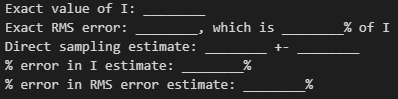

In [16]:
#TODO: shouldn't I be 1/L * mean???
#TODO: use Sn/ sqrt(n) as mu
def f(x):
    """Function to integrate"""
    return (1 + x**(3/2)) * np.exp(-2 * x)

def monte_carlo_estimate(n, L):
    """Estimate the integral of f(x) over [0, L] using Monte Carlo method with n samples"""
    
    # Randomly sample n points from [0, L]
    x_values = rng.uniform(0, L, n)
    # Evaluate f at these points
    f_values = f(x_values)
    
    # Calculate mean and variance
    mean_f = np.mean(f_values)
    variance_f = np.var(f_values)
    
    # Monte Carlo estimate for the integral
    I_estimate = L * mean_f
    
    # RMS error estimate
    RMS_error = L * np.sqrt(variance_f / n)
    
    return I_estimate, RMS_error

L = 10
n = 20000
I_estimate, RMS_error = monte_carlo_estimate(n, L)





# Integrate using scipy's quad function
I, error = integrate.quad(f, 0, 10)
print("Exact value of I:", I)
print("Exact RMS Error: ",error) #TODO: is this correct?

print(f"Direct Sampling Estimate: {I_estimate:.4f}")
print(f"Estimated RMS error: {RMS_error:.4f}")


Exact value of I: 0.7349963646225187
Exact RMS Error:  1.7549935948935058e-09
Direct Sampling Estimate: 0.7433
Estimated RMS error: 0.0124


# Question 4: Monte Carlo Integration - Importance Sampling

Repeat the previous question, but now using importance sampling. A possible choice for sampling distribution would be $g(x) \propto e^{-ax}$, with $a$ an adjustable parameter, since it has a similar shape to $f(x)\pi(x)$. You should find that for small values of $a$ you get essentially the same results as before. For large values of $a$ the RMS error will increase drastically due to the large variation in the weight function $w(x)=\pi(x)/g(x)\propto e^{ax}$. However, for more moderate values of $a$ this approach should easily outperform direct sampling. Play around with the value of $a$ and find one that works well. Present your results as before. In particular, to achieve the same level of accuracy as in Question 3, what sample size would you need here?

In [31]:

# Define the function f(x)
def f(x):
    return (1 + x**1.5) * np.exp(-2*x)

# Define the weight function w(x)
def w(x, a):
    return 10 * np.exp(a * x)

def mc_importance_sampling(a, n):
    
    # Sample from g(x) ~ e^{-ax}
    x_samples = -np.log(1 - rng.uniform(0, 1, n)) / a

    # Exclude samples that fall outside [0, 10]
    x_samples = x_samples[x_samples <= 10]

    # Calculate the MC estimate
    I_estimate = np.mean(f(x_samples) * w(x_samples, a))
    RMS_error = np.std(f(x_samples) * w(x_samples, a)) / np.sqrt(n)
    
    return I_estimate, RMS_error


a = 0.005  
n = 20000

I_estimate, RMS_error = mc_importance_sampling(a, n)
print(f"Estimated value of I: {I_estimate}")
print(f"RMS Error: {RMS_error}")


Estimated value of I: 0.6998246233257627
RMS Error: 0.012145793192462393


# Question 5
Consider a system in the canonical ensemble at a temperature $T$. The expectation value of an observable $\mathcal{O}$ is then given in terms of the Boltzmann distribution $\pi(s)=\frac{1}{Z}e^{-\beta U(s)}$ by $$\langle \mathcal{O} \rangle=\sum_{s\in S}\pi(s)\mathcal{O}(s).$$
Ideally, we would like to apply direct sampling, and generate states from $S$ according to the Boltzmann distribution. However, for interacting systems this is no easy task. Later we will see how Markov chain Monte Carlo allows us to do this. It might appear that importance sampling could provide a solution here, and that we can just sample from $S$ using a simple uniform distribution $g(s)=|S|^{-1}$, and then correct for this using the $w(s)=\pi(s)/g(s)$ weights. However, this quickly raises another problem, namely that we usually don't know the partition function $Z$, which is probably about as difficult to calculate as $\langle \mathcal{O} \rangle$ itself. 

Self-normalising importance sampling does offer a patial solution here, since it only requires us to know the weights up to a constant factor, and so we can use $w(s)=e^{-\beta U(s)}$. (*Side note: This is perhaps an example of what is sometimes called **simple sampling**, i.e. to sample uniformly and then correct for this using appropriate weights.*) This approach works well enough at high temperatures where the Boltzmann distribution is not too strongly peaked around the low-energy states, so that the weight function does not vary by much. However, at low temperatures this approach will fail badly. This is because the uniformly generated states are overwhelmingly likely to have fairly high energies, and their weights (i.e. Boltzmann factors) will therefore be extremely small. The handful of low-energy states (or maybe just the lowest energy one) in the sample will then completely dominate the sample mean, effectively resulting in a very small sample size, and large errors.

In this question we will see this play out in the context of a simple solvable model, the well-known two-state paramagnet. We consider $N$ classical spins $s_i=\pm1$ which interact with an external magnetic field. The magnetisation and energy of a state $s$ is then given by $M(s)=\sum_i s_i$ and $U(s)=-hM(s)$. Here $h$ is a measure of the magnetic field strength. 

1. Define a function that implements, for given $N$, $\beta h$ and sample size $n$, self-normalising importance sampling with weight function $w(x)=e^{-\beta U(s)}$ to produce an estimate of the paramagnet's average magnetization $\langle M \rangle$. Produce a plot of your estimate for $\langle M \rangle/N$ as a function of $\beta h\in[0,5]$ for $N=30$, together with the exact result. Discuss what you observe. Can you explain why the estimates for $\langle M \rangle/N$ are so poor at lower temperatures, and why these estimates seem to discretised?
2. Since the paramagnet is a non-interacting system, the spins are independent random variables as far as the Boltzmann distribution is concerned. This makes it easy to generate states according to the Boltzmann distribution, and to apply direct sampling instead. Write a second version of your function, now using direct sampling, and compare the results to those you obtained previously.

**Note:** *With direct sampling you should find very good agreement with the exact result even for $n=500$. Take a moment to appreciate how remarkable this is. The exact expectation value is a sum of $2^{30}=1\,073\,741\,824$ terms. You are producing an accurate estimate of this sum by taking into account only about $500\approx 0.000047\%$ of them.*

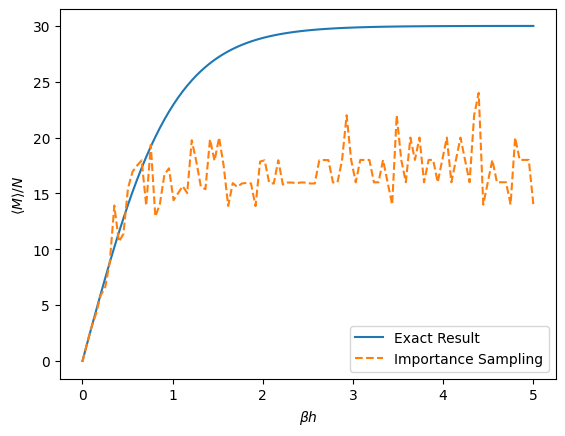

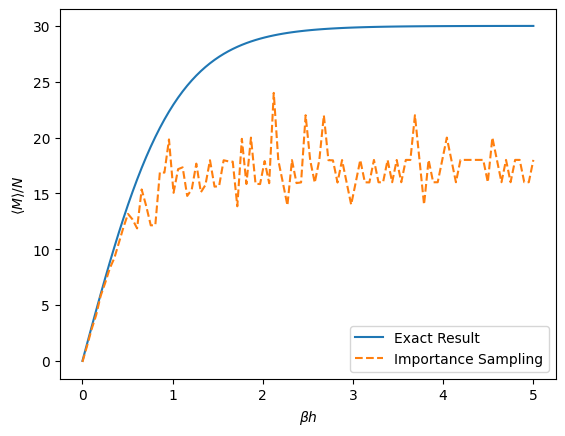

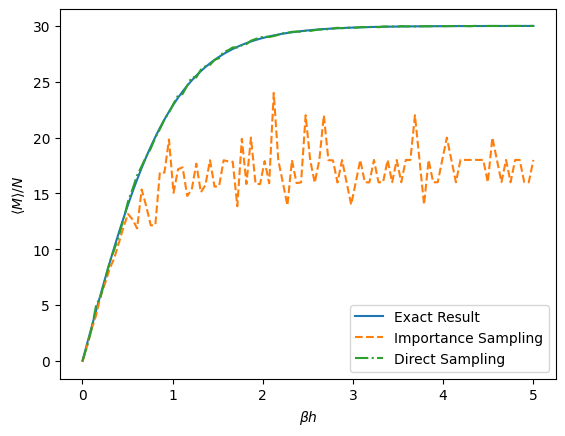

In [35]:
# Energy of a state
def U(s, h):
    return -h * np.sum(s)

# Weight function
def w(s, beta, h):
    return np.exp(-beta * U(s, h))

# Self-normalizing importance sampling
def importance_sampling(N, beta_h, n):
    states = np.random.choice([1, -1], size=(n, N))
    weights = np.array([w(s, beta_h, 1) for s in states])
    
    normalized_weights = weights / np.sum(weights)
    magnetizations = np.sum(states, axis=1)
    
    average_M = np.sum(normalized_weights * magnetizations)
    return average_M


betas = np.linspace(0, 5, 100)
exact_results = 30 * np.tanh(betas)
estimated_results = np.array([importance_sampling(30, beta_h, 1000) for beta_h in betas])

plt.plot(betas, exact_results, label='Exact Result')
plt.plot(betas, estimated_results, label='Importance Sampling', linestyle='--')
plt.xlabel(r'$\beta h$')
plt.ylabel(r'$\langle M \rangle / N$')
plt.legend()
plt.show()


betas = np.linspace(0, 5, 100)
exact_results = 30 * np.tanh(betas)
estimated_results = np.array([importance_sampling(30, beta_h, 1000) for beta_h in betas])

plt.plot(betas, exact_results, label='Exact Result')
plt.plot(betas, estimated_results, label='Importance Sampling', linestyle='--')
plt.xlabel(r'$\beta h$')
plt.ylabel(r'$\langle M \rangle / N$')
plt.legend()
plt.show()


def direct_sampling(N, beta_h, n):
    # Probabilities for the two states, given beta_h
    prob_plus = 1 / (1 + np.exp(-2 * beta_h))
    prob_minus = 1 - prob_plus
    
    # Generate states
    states = np.random.choice([1, -1], size=(n, N), p=[prob_plus, prob_minus])
    
    # Calculate average magnetization
    average_M = np.mean(np.sum(states, axis=1))
    return average_M


estimated_results_direct = np.array([direct_sampling(30, beta_h, 500) for beta_h in betas])

plt.plot(betas, exact_results, label='Exact Result')
plt.plot(betas, estimated_results, label='Importance Sampling', linestyle='--')
plt.plot(betas, estimated_results_direct, label='Direct Sampling', linestyle='-.')
plt.xlabel(r'$\beta h$')
plt.ylabel(r'$\langle M \rangle / N$')
plt.legend()
plt.show()
